<h1 align="center">Machine Learning Approaches for Predicting Coronary Heart Disease </h1>

<h2 align="center">Dataset</h2>

In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/nick/Downloads/heart-disease.csv')

# Display first few rows
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


<h2 align="center">Data Pre-processing</h2>

In [32]:
import pandas as pd

# Check and encode 'famhist' column
if 'famhist' in data.columns:
    # Map 'Present' to 1 and 'Absent' to 0
    data['Famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})
    # Remove original 'famhist' column
    data.drop('famhist', axis=1, inplace=True)
else:
    # Check for missing values 
    print("'famhist' column does not exist in the DataFrame.")

# Identify any missing values across columns
missing_values = data.isnull().sum()
print(missing_values)

# Save the cleaned data to a new CSV file
data.to_csv('/Users/nick/Downloads/preprocessed_data.csv', index=False)
# Confirmation message
print('Preprocessed data has been saved.')

# Show the first few rows to confirm changes
data.head()

sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
Famhist      0
dtype: int64
Preprocessed data has been saved.


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,Famhist
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1


<h2 align="center">Exploratory Data Analysis (EDA)</h2>

<h3 align="center">Descriptive Statistics</h3>

In [33]:
import pandas as pd

# Calculate statistical characteristics of the dataset
statistical_characteristics = data.describe()

# Display the statistical characteristics
statistical_characteristics

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,Famhist
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320,0.415584
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313,0.493357
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000,1.000000


<h3 align="center">Family History and CHD Events</h3>

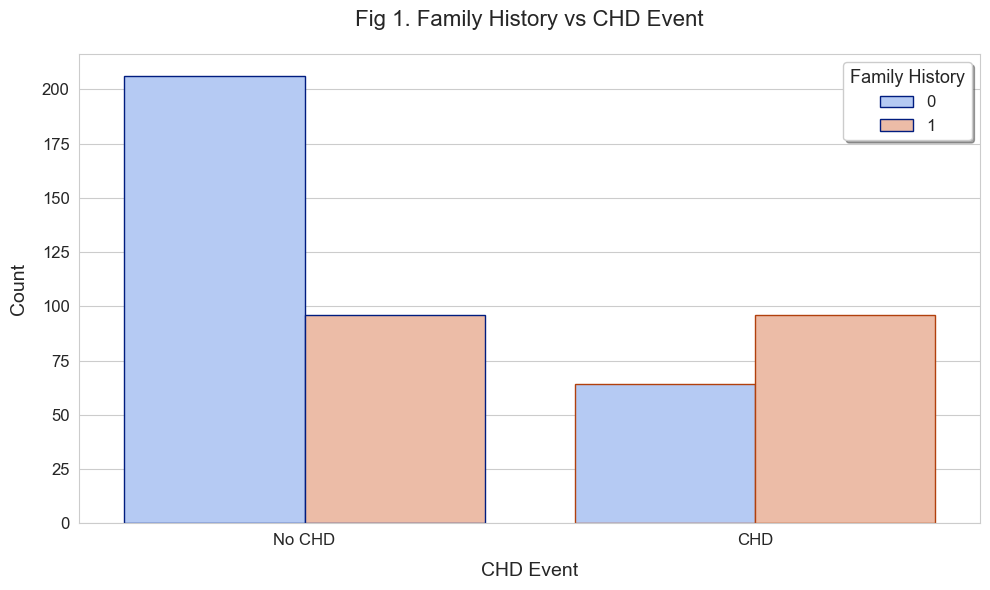

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a more attractive countplot with seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x='chd', hue='Famhist', data=data, palette='coolwarm', edgecolor=sns.color_palette("dark", 3))

# Add labels, title, and improve legend
plt.xlabel('CHD Event', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Fig 1. Family History vs CHD Event', fontsize=16, pad=20)
plt.xticks([0, 1], ['No CHD', 'CHD'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Family History', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()

<h3 align="center">CHD Event Frequency</h3>

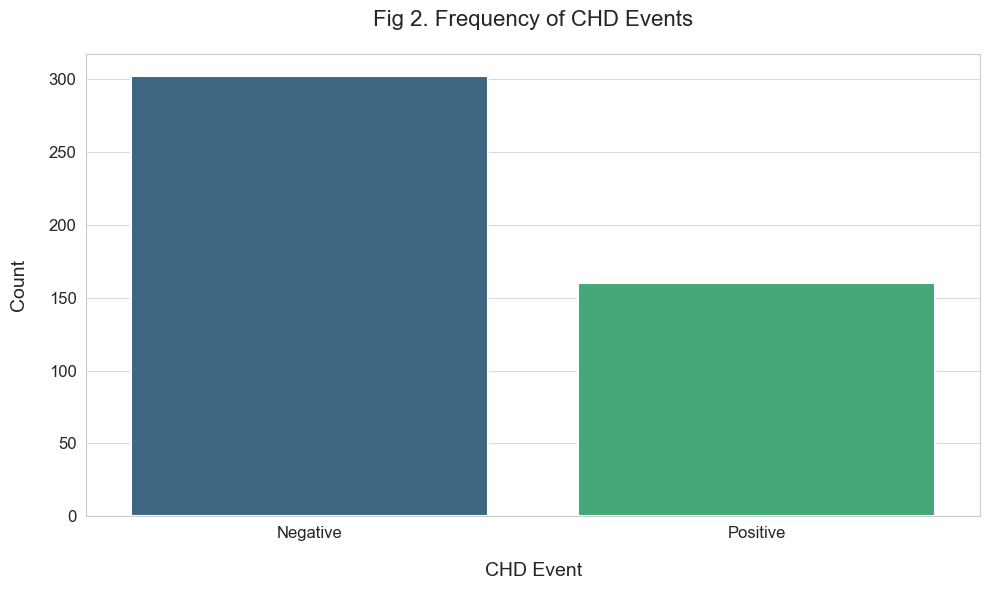

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a more attractive countplot with seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='chd', data=data, palette='viridis', saturation=0.75,linewidth=1.5)

# Add labels, title, and improve font sizes
plt.xlabel('CHD Event', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)
plt.title('Fig 2. Frequency of CHD Events', fontsize=16, pad=20)
plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Ensure layout is well-organized
plt.tight_layout()

# Show the plot
plt.show()

<h3 align="center">Data Imbalance</h3>

In [36]:
import pandas as pd

# 'chd' is the target column
y = data['chd']

# Count the occurrences of each class in the target column
class_distribution = y.value_counts()

# Calculate the percentage of each class
class_percentage = y.value_counts(normalize=True) * 100

print("Class Distribution:\n", class_distribution)
print("\nClass Percentage:\n", class_percentage)

Class Distribution:
 chd
0    302
1    160
Name: count, dtype: int64

Class Percentage:
 chd
0    65.367965
1    34.632035
Name: proportion, dtype: float64


<h3 align="center">Boxplot Analysis</h3>

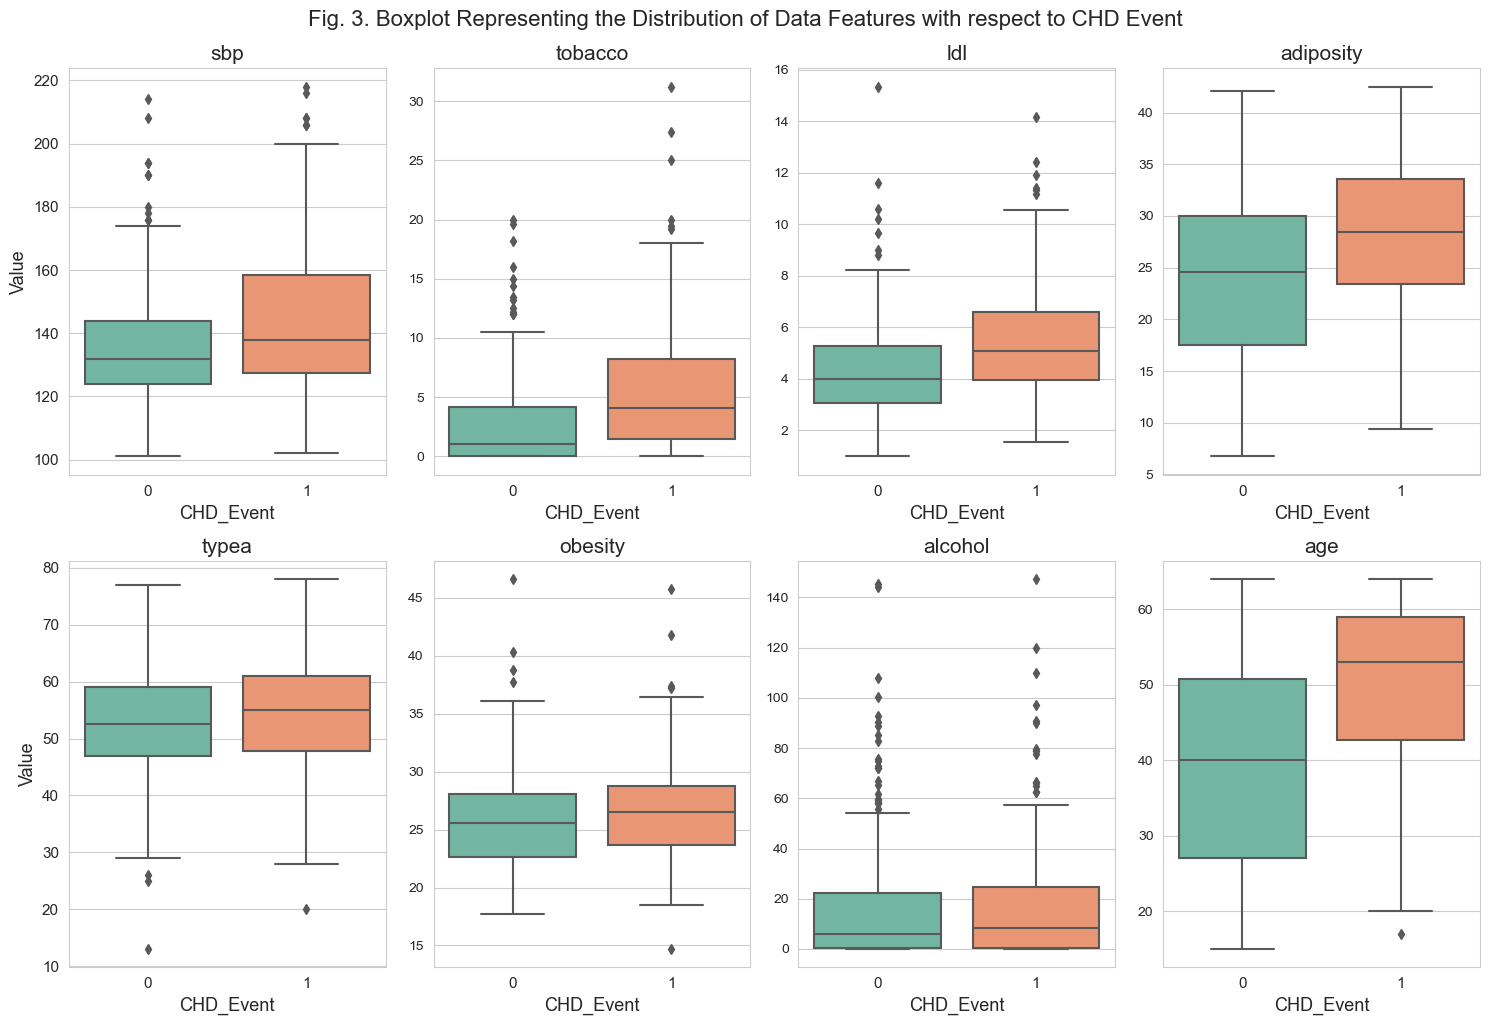

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Flatten axes for iteration
axes = axes.flatten()

# Features to plot
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Create boxplot for each feature
for i, feature in enumerate(features):
    # Plot boxplot
    sns.boxplot(data=data, x='chd', y=feature, ax=axes[i], palette="Set2")
    
    # Set subplot title
    axes[i].set_title(feature, fontsize=15)
    
    # Set x-axis label and increase font size
    axes[i].set_xlabel('CHD_Event', fontsize=13)
    axes[i].tick_params(axis='x', labelsize=11)
    
    if i % 4 == 0:
        # Set y-axis label and increase font size for the first column
        axes[i].set_ylabel('Value', fontsize=13)
        axes[i].tick_params(axis='y', labelsize=11)
    else:
        # Clear y-axis label to avoid clutter
        axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Set main title
plt.suptitle('Fig. 3. Boxplot Representing the Distribution of Data Features with respect to CHD Event', 
             fontsize=16, y=1.02)

# Show plot
plt.show()

<h2 align="center">Features importance using Random Forest</h2>

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Accuracy: 0.7419354838709677


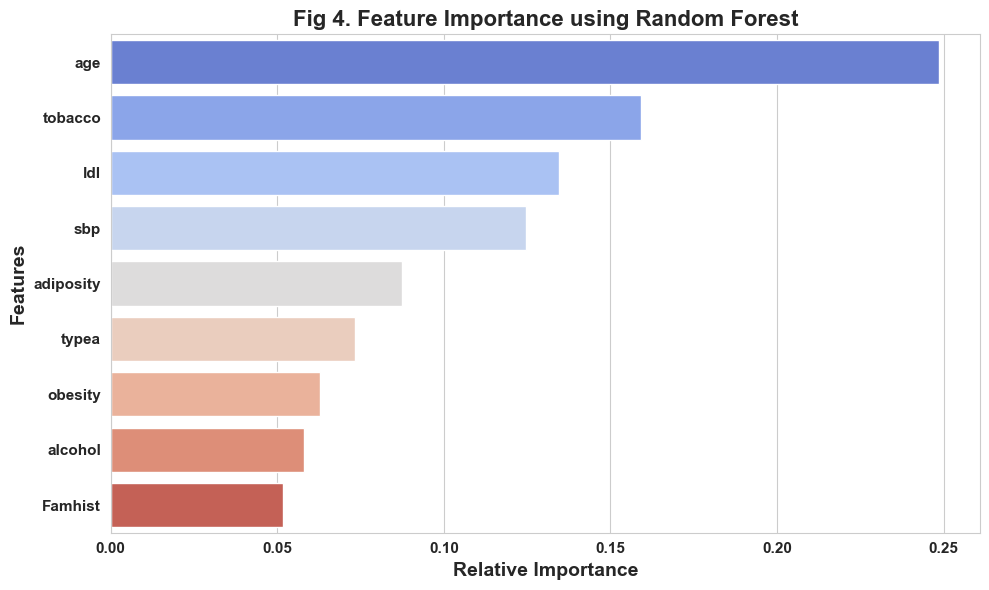

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import KMeansSMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv('/Users/nick/Downloads/preprocessed_data.csv')

# Prepare the features (X) and target (y)
X = df.drop('chd', axis=1)
y = df['chd']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline setup with SMOTE and RandomForestClassifier
pipeline = make_pipeline_imb(
    StandardScaler(),
    KMeansSMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

# Define grid search parameters
param_grid = {
    'randomforestclassifier__n_estimators': [100, 500, 600],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get feature importances from the best model
feature_importances = best_model.named_steps['randomforestclassifier'].feature_importances_

# Create a pandas Series with feature names and their importance scores
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='coolwarm')

# Add labels and title to the plot
plt.xlabel('Relative Importance', fontsize=14, weight='bold')
plt.ylabel('Features', fontsize=14, weight='bold')
plt.title('Fig 4. Feature Importance using Random Forest', fontsize=16, weight='bold')
plt.xticks(fontsize=11, ha='center', weight='bold')  
plt.yticks(fontsize=11, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<h2 align="center">Correlation Analysis</h2>

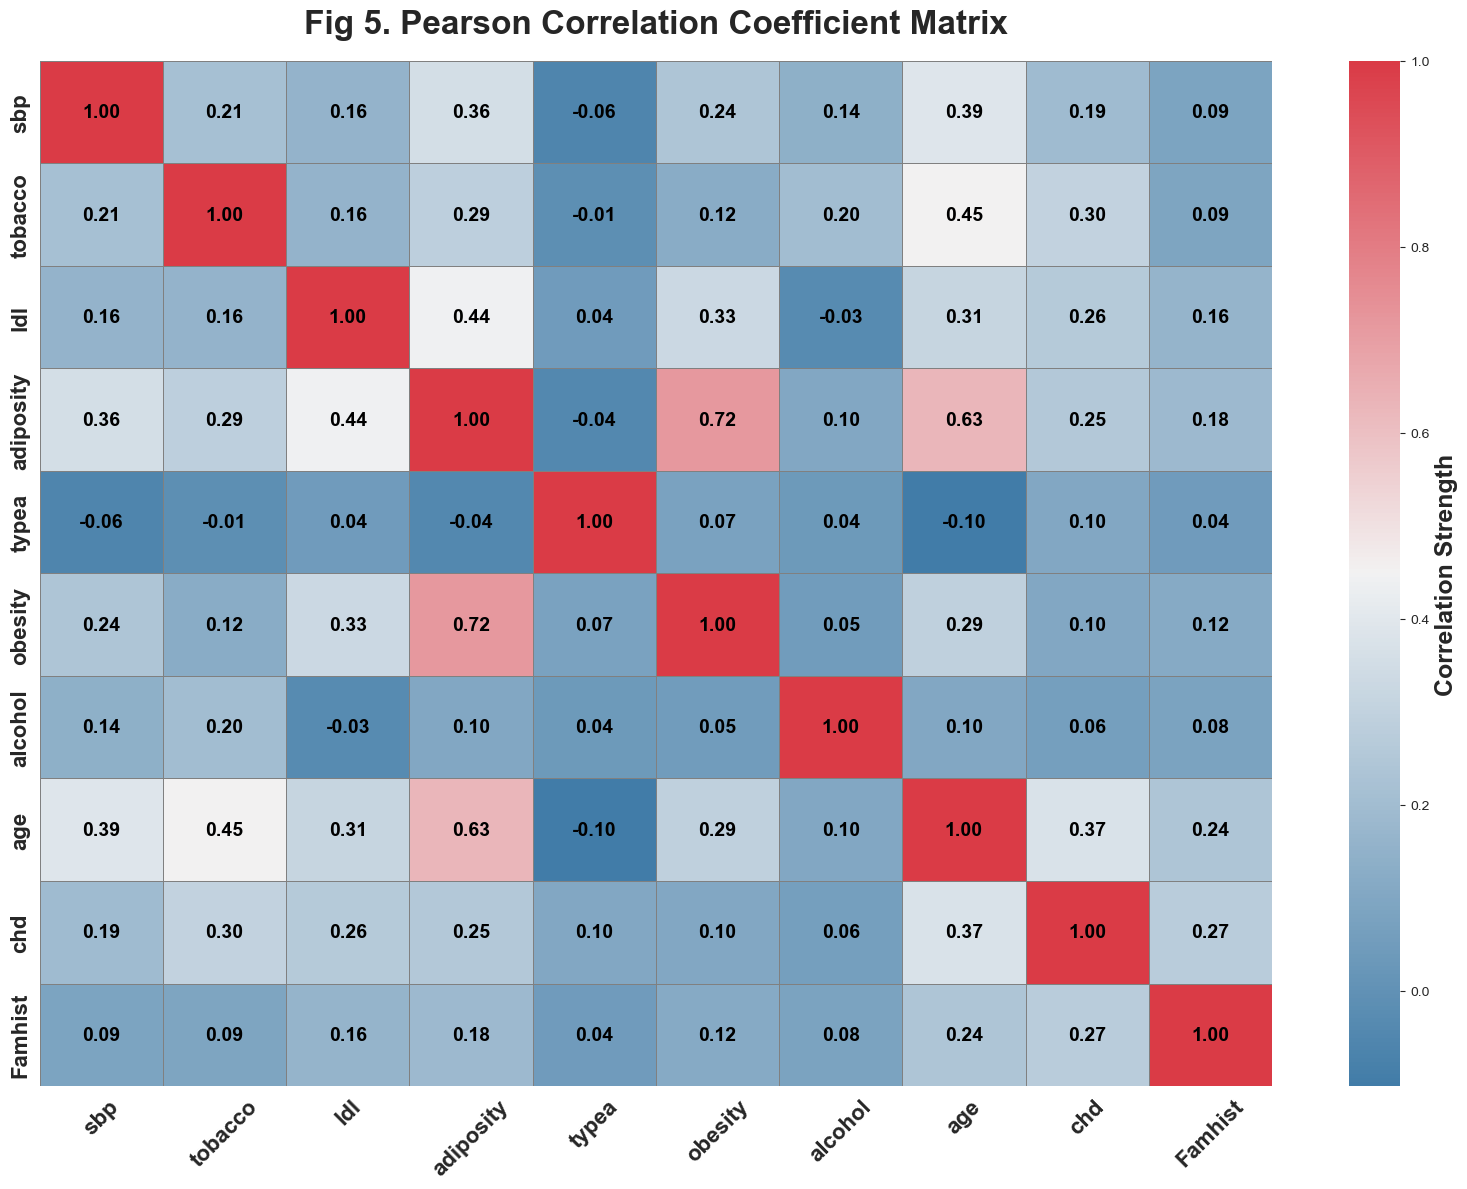

In [39]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Choose a seaborn style with whitegrid but without the internal grid
sns.set_style('whitegrid', {'axes.grid': False})

# Set up a larger figure size for better readability
plt.figure(figsize=(16, 12))

# Create a diverging color palette for better distinction of values
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Generating a heatmap with annotations, a float format, and our color map
ax = sns.heatmap(correlation_matrix, 
                 annot=True,
                 cmap=cmap,
                 fmt=".2f",
                 annot_kws={"size": 14, "weight": "bold", "color": "black"}, 
                 linewidths=0.5,  # Reduce line width for minimal style
                 linecolor='gray',  # Neutral line color
                 cbar_kws={'shrink': 1, 'label': 'Correlation Strength'})

# Increasing font size for correlation strength in colorbar and making it bold
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Correlation Strength', fontsize=18, weight='bold')

# Title and labels
plt.title('Fig 5. Pearson Correlation Coefficient Matrix', fontsize=24, pad=20, weight='bold')
plt.xticks(fontsize=16, rotation=45, ha='center', weight='bold')  
plt.yticks(fontsize=16, weight='bold')

# Tight layout for spacing
plt.tight_layout()  

# Show plot
plt.show()

<h2 align="center">Logistic Regression with Ridge Penalty</h2>

In [40]:
# Import necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Setup features and target, excluding 'obesity'
X = df.drop(['chd', 'obesity'], axis=1)
y = df['chd']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup pipeline with scaling, SMOTE, and logistic regression
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('kmeanssmote', KMeansSMOTE(random_state=42)),
    ('logisticregression', LogisticRegression(random_state=42, max_iter=10000))
])

# Define hyperparameter space
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 0.25, 0.5, 1, 10, 100],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__penalty': ['l2']
}

# Grid search for best parameters
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train, y_train)

# Output best parameters and CV score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate on test set
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Calculate and print specificity
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
Best CV score: 0.7075
Accuracy: 0.7527
F1 Score: 0.7557
Precision: 0.7630
Recall: 0.7527
Specificity: 0.7627


<h2 align="center">Classifier Exploration</h2>

<h3 align="center">Support Vector Machine (SVM)</h3>

In [41]:
# Import necessary libraries 
from sklearn.svm import SVC

# Create pipeline: scaling, SMOTE, SVM classifier
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('svmsmote', SVMSMOTE(random_state=42, k_neighbors=5, m_neighbors=10)),  
    ('svm', SVC(random_state=42))])

# Define grid search parameters
param_grid = {
    'svm__kernel': ['rbf'],
    'svm__C': [8, 10, 12, 14, 16], 
    'svm__gamma': [0.01, 0.05, 0.1, 0.15, 0.2]}

# Execute grid search
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train, y_train)

# Output best model details
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Test model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Specificity from confusion matrix
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best parameters: {'svm__C': 14, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best CV score: 0.6968
Accuracy: 0.7849
F1 Score: 0.7835
Precision: 0.7828
Recall: 0.7849
Specificity: 0.8475


<h3 align="center">K-Nearest Neighbours (KNN)</h3>

In [42]:
# Import necessary libraries 
from sklearn.neighbors import KNeighborsClassifier

# Pipeline: Scale data, apply SMOTE, use KNN
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('kmeanssmote', KMeansSMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())])

# Hyperparameters for grid search
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 18, 20, 21, 22, 23, 24, 25],  
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'], 
    'knn__p': [1, 2]}

# Execute grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train) 

# Output best model details
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test model on hold-out set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Specificity from confusion matrix
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) 
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 21, 'knn__p': 2}
Best CV score: 0.7128
Accuracy: 0.7419
F1 Score: 0.7419
Precision: 0.7419
Recall: 0.7419
Specificity: 0.7966


<h3 align="center">Multilayer Perceptron (MLP) Neural Network</h3>

In [43]:
# Import necessary libraries 
from sklearn.neural_network import MLPClassifier

# Pipeline: Scale data, apply SMOTE, use MLP classifier
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('kmeanssmote', KMeansSMOTE(random_state=42)),
    ('mlpclassifier', MLPClassifier(random_state=42, max_iter=1000))])

# Define grid search parameters
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(100,), (100, 50), (128, 64)],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam'], 
    'mlpclassifier__learning_rate_init': [0.001, 0.01],
    'mlpclassifier__alpha': [0.0001, 0.001], 
    'mlpclassifier__early_stopping': [True]}

# Execute grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)  # Fit model

# Output best model details
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Test model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Specificity from confusion matrix
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) 
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters: {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (128, 64), 'mlpclassifier__learning_rate_init': 0.01, 'mlpclassifier__solver': 'sgd'}
Best CV score: 0.7047
Accuracy: 0.7634
F1 Score: 0.7667
Precision: 0.7763
Recall: 0.7634
Specificity: 0.7627


<h3 align="center">Naive Bayes</h3>

In [44]:
# Import necessary libraries 
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB

# Pipeline: Binarizer + SMOTE + BernoulliNB
pipeline = make_pipeline_imb(
    Binarizer(), 
    SMOTE(random_state=42),
    BernoulliNB())

# Parameters for grid search
param_grid = {
    'binarizer__threshold': [0.15, 0.175, 0.2, 0.225, 0.25],  
    'bernoullinb__alpha': [0.0005, 0.00075, 0.001, 0.00125, 0.0015],  
    'bernoullinb__class_prior': [
        [0.55, 0.45], [0.575, 0.425],
        [0.6, 0.4],  
        [0.625, 0.375], [0.65, 0.35]]}

# Execute grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)  

# Display best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Model evaluation on test set
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Specificity from confusion matrix
cm = confusion_matrix(y_test, y_pred) 
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)  
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
Best parameters: {'bernoullinb__alpha': 0.0005, 'bernoullinb__class_prior': [0.55, 0.45], 'binarizer__threshold': 0.15}
Best CV score: 0.6992
Accuracy: 0.7204
F1 Score: 0.7185
Precision: 0.7173
Recall: 0.7204
Specificity: 0.7966


 <h3 align="center">Quadratic Discriminant Analysis (QDA)</h3>

In [45]:
# Import necessary libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Pipeline setup: Scale -> SMOTE -> QDA
pipeline = make_pipeline_imb(
    StandardScaler(),
    KMeansSMOTE(random_state=42), 
    QuadraticDiscriminantAnalysis())

# Grid search parameters
param_grid = {
    'quadraticdiscriminantanalysis__reg_param': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# Execute grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate on test set
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}") 

# Specificity calculation
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 13 candidates, totalling 130 fits
Best parameters: {'quadraticdiscriminantanalysis__reg_param': 0.25}
Best CV score: 0.7209
Accuracy: 0.7957
F1 Score: 0.7974
Precision: 0.8007
Recall: 0.7957
Specificity: 0.8136


<h3 align="center">Linear Discriminant Analysis (LDA)</h3>

In [46]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Pipeline: Scale -> Balance (SMOTE) -> Classify (LDA)
pipeline = make_pipeline_imb(
    StandardScaler(),
    SMOTE(random_state=42),
    LinearDiscriminantAnalysis())

# Define hyperparameters for GridSearch
param_grid = {
    'lineardiscriminantanalysis__solver': ['lsqr', 'eigen'],  
    'lineardiscriminantanalysis__shrinkage': [0.85, 0.875, 0.9, 0.925, 0.95],}

# GridSearch for optimal parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)  

# Display best parameters/score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test set predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate on test set
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}") 
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")  

# Specificity calculation
tn, fp, _, _ = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'lineardiscriminantanalysis__shrinkage': 0.925, 'lineardiscriminantanalysis__solver': 'lsqr'}
Best CV score: 0.6885
Accuracy: 0.7097
F1 Score: 0.7150
Precision: 0.7479
Recall: 0.7097
Specificity: 0.6610
